Universidad Tecnologica Nacional FRBA
Alumno:

El amplificador push pull de la figura opera en clase C según los siguientes valores:

$V_{DD}=110 Vdc$

$V_{GG}=-5 Vdc$

$V_g= 15\,V \cdot cos(2 \pi 1MHz t)$

$V_{ds_{min}}=10\,V$

El tanque de salida formado por L y C está sintonizado a $1\,MHz$


![5-cuatrocientos](fig/push_pull_circuito.png)

Determinar:
1- $I_{d1}$, $I_{do}$ de cada mosfet

2- $I_{d2}, $I_{d3}$ de cada mosfet

3- $P_o$: potencia total de salida en fundamental sobre $R_L$

4- $N2/N1$, $L$, $C$

5- Potencia disipada en cada mosfet

6- $P_o(2MHz)$: potencia total de segunda armónica disipada en $R_L$ .

7- $P_o(3MHz)$: potencia total de tercera armónica disipada en $R_L$

8- La señal $V_g$ se cambia por una portadora de $10\,Vpico$ modulada en AM al 50\% por un tono puro de $1 KHz$. Se mantiene $f_o= 1\,MHz$ y $V_{GG}=-5V$. Determinarla PEP en fundamental sobre RL

9- Para la señal del ítem 8 ;Cuál debería ser el índice de modulación de Vg tal que el índice de modulación sobre RL sea mo=100\%?

10-Se cambia Vg por una señal de DSB-SC con portadora en 1 Mhz y moduladapor un tono puro de audio de 1 Khz. ;Cuál deberá ser el módulo de cada fasorbanda lateral-para que la PEP sobre RL sea igual a la del item 8?


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 14,
          'figure.figsize': (6, 6),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}
plt.rcParams.update(params) 

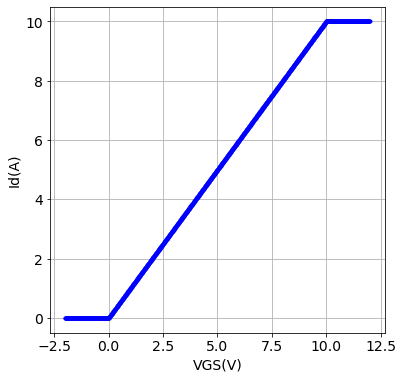

In [4]:
# Defino la transferencia del dispositivo
def idi(v):
    i =  0.             if (v < 0) else 0
    i = (1)*(v) if (v >= 0  and v < 10) else i
    i = (10) if (v >= 10  ) else i
    return i


# Grafico para verificar!
vgsa = np.arange(-2,12,0.01)
idsa = np.array([idi(v) for v in vgsa])

plt.plot(vgsa,idsa,'b.')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Id(A)')
plt.xlabel('VGS(V)')
plt.show()

In [5]:
# Tensión Fuente
VDD  = 110
# Tension minima 
Vmin = 10
# Tension entrada 
VGG = -5
vg  = 15

# Filtro salida
Qo  = np.inf
Qc  = 10

# Frecuencia de trabajo
fc = 100e6
RL = 50
Ri = 50

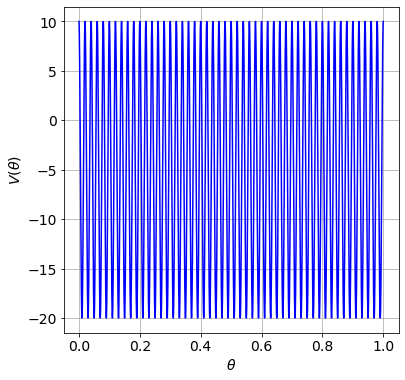

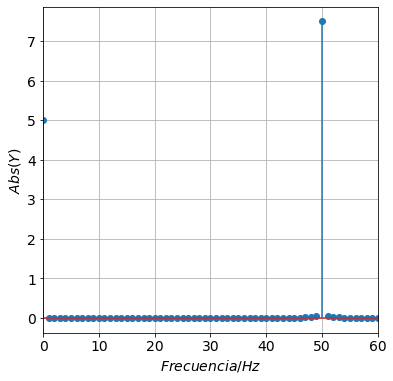

In [6]:
# Tensión entrada
# defino el sampleo
n  = 10000
m  = 0
# vector de tiempo 
t  = np.linspace(0, 1, num=n)
ds = t[1]

vgs = VGG + vg*(1+m*np.cos(2*np.pi*t)) * np.cos(2*np.pi*t*50)



plt.plot(t, vgs,'b-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('$V(\\theta)$')
plt.xlabel('$\\theta$')
plt.show()

Yv = fft(vgs)/len(vgs)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Yv) )  # Representamos la parte imaginaria
plt.xlim(-0.1, 150)
plt.xlim(0, 60)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()


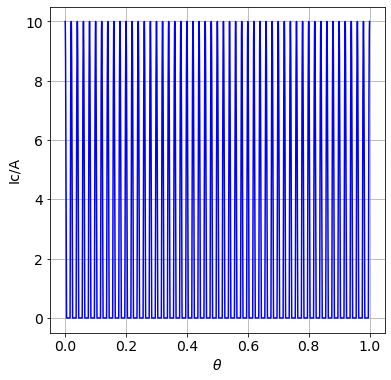

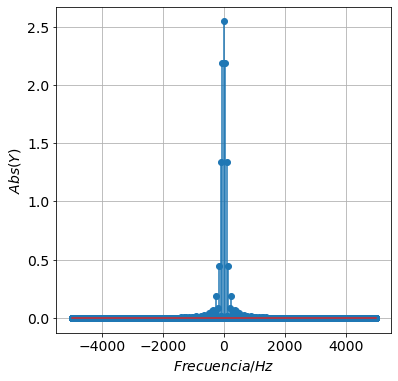

In [7]:
# Corriente de salida
ids = np.array([idi(v) for v in vgs])

plt.plot(t, ids,'b-')
#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic/A')
plt.xlabel('$\\theta$')
plt.show()

Y = fft(ids)/len(ids)  # Normalizada
#S = np.fft.fftshift(np.fft.fft(s))
#S_mag = np.abs(S)
#S_phase = np.angle(S)


frq = fftfreq(len(ids), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
#plt.ylim(0, 60)
plt.xlabel('$Frecuencia/Hz$'); plt.ylabel('$Abs(Y)$')
plt.grid(); plt.show()

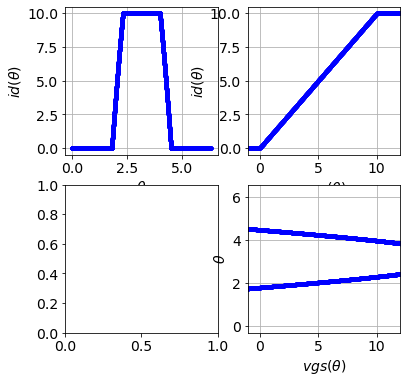

In [8]:
th  = np.linspace(0, 2*np.pi, num=n)


vgs = VGG + vg *1.5* np.cos(th+np.pi)

# Corriente de salida
ids = np.array([idi(v) for v in vgs])

#Oscilogramas
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)


# Plot various projections of the samples.
ax1.plot(th, ids, 'b.-')
ax1.grid(True)
ax1.set(xlabel='$\\theta$', ylabel='$id(\\theta)$')


ax2.plot(vgsa, idsa, 'b.-')
ax2.grid(True)
ax2.set(xlabel='$vgs(\\theta)$', ylabel='$id(\\theta)$')
ax2.set(xlim=(-1, 12))

ax4.plot(vgs,th, 'b.-')
ax4.set(xlabel='$vgs(\\theta)$', ylabel='$\\theta$')
ax4.set
ax4.grid(True)
ax4.set(xlim=(-1, 12))

plt.show()


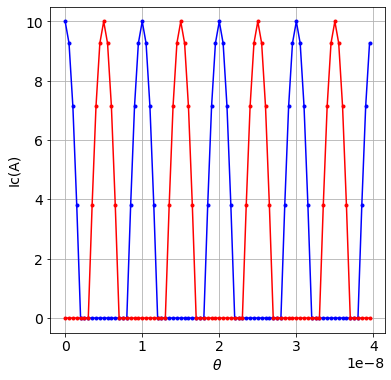

In [9]:
# Defino muestreo para graficar 
# La frecuencia maxima que muestra Fourier es fs/2
# Se busca que fuera de la zona de Nysquit las componentes armonicas sean despresiables
fc = 100e6
fs = 20*fc
ds = 1/fs

# vector de tiempo 
# Defino resolución espectral en frecuencia !
numT  = 4
T     = numT/fc
time  = np.arange(0,T,ds)


vgs1 = VGG + vg * np.cos(2*np.pi*fc*time)
vgs2 = VGG - vg * np.cos(2*np.pi*fc*time)

idst1 = np.array([idi(v) for v in vgs1])
idst2 = np.array([idi(v) for v in vgs2])


plt.plot(time, idst1,'b.-')
plt.plot(time, idst2,'r.-')

#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()


Id0_1 = 2.522 A
Id1_1 = 4.366 A
Id2_1 = 2.704 A
Id3_1 = 0.922 A
Id0 = 0.000 A
Id1 = 8.731 A
Id2 = 0.000 A
Id3 = 1.845 A


/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


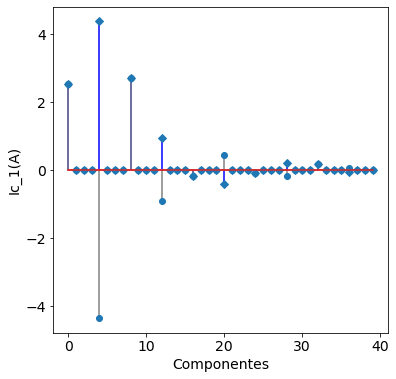

In [25]:
# Transformada Discreta de Fourier    
# Se calcula a modo ejemplo con objetivos didacticos (no es la forma optima!)
def DFT(x):
    N = len(x)
    X = list()
    for k in range(int(N/2)):
        a = 2*sum([s*np.cos(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        b = 2*sum([s*np.sin(2*np.pi*n*k/N) for n,s in enumerate(x)])/N
        if k == 0: X.append(a/2)
        else     : X.append(a+1j*b)
    return np.array(X) 


# Transformada Inversa Discreta de Fourier       
def IDFT(X, arm = None):
    N = len(X)
    x = list()
    
    a = [S if k==arm else 0 for k,S in enumerate(X)]
    
    for n in range(N):
        x.append( sum([S.real*np.cos(2*np.pi*k*n/N)+S.imag*np.sin(2*np.pi*k*n/N) for k,S in enumerate(X)]))
    return np.array(x)/N  

def IDFT_Adrian(X, arm = 1):
    N = len(X)
    x = np.zeros(N)
    a = np.zeros(N)
    a[arm] = X[arm]
    
    for n in range(N):
        x[n] = sum([S.real*np.cos(2*np.pi*k*n/N)+S.imag*np.sin(2*np.pi*k*n/N) for k,S in enumerate(X)])
    return x/N

# Calculo las componentes de la serie de Fourier

Idsf1 = DFT(idst1)

print('Id0_1 = {:1.3f} A'.format(abs(Idsf1[0]   ) ) )
print('Id1_1 = {:1.3f} A'.format(abs(Idsf1[numT]) ) )
print('Id2_1 = {:1.3f} A'.format(abs(Idsf1[numT*2]   ) ) )
print('Id3_1 = {:1.3f} A'.format(abs(Idsf1[numT*3]) ) )


Idsf2 = DFT(idst2)

Idsf  = DFT(idst1-idst2)

print('Id0 = {:1.3f} A'.format(abs(Idsf[0]   ) ) )
print('Id1 = {:1.3f} A'.format(abs(Idsf[numT]) ) )
print('Id2 = {:1.3f} A'.format(abs(Idsf[numT*2]   ) ) )
print('Id3 = {:1.3f} A'.format(abs(Idsf[numT*3]) ) )


# Grafico
plt.stem((Idsf1),linefmt='blue',markerfmt='D'  )
plt.stem((Idsf2),linefmt='grey'  )
plt.ylabel('Ic_1(A)')
plt.xlabel('Componentes')
plt.show()



/home/aalmela/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


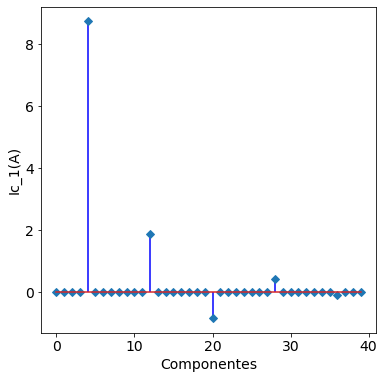

In [26]:
# Grafico
plt.stem((Idsf),linefmt='blue',markerfmt='D'  )
plt.ylabel('Ic_1(A)')
plt.xlabel('Componentes')
plt.show()

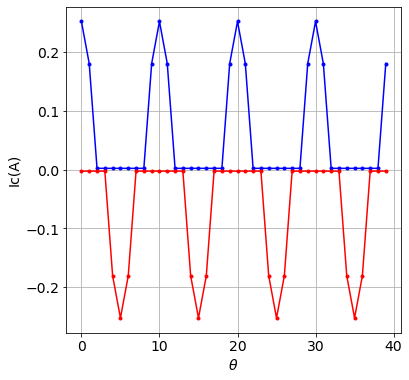

In [27]:
idst = idst1 - idst2 


#plt.plot(time, idst1,'b.-')


s1 = IDFT(Idsf1, )
s2 = IDFT(Idsf2)
plt.plot( s1,'b.-')
plt.plot( -s2,'r.-')

#plt.axis([0, 4, 0, 4.5])
plt.grid()
plt.ylabel('Ic(A)')
plt.xlabel('$\\theta$')
plt.show()

Id0 = 0.000 A, Phase= 180.000
Id1 = 8.731 A, Phase= 0.000
Id2 = 0.000 A, Phase= 135.000
Id3 = 1.845 A, Phase= -0.000
Id4 = 0.000 A, Phase= 165.964
Id5 = 0.854 A, Phase= -180.000
Id6 = 0.000 A, Phase= 32.433
Id7 = 0.391 A, Phase= -0.000
Id9 = 0.113 A, Phase= -180.000


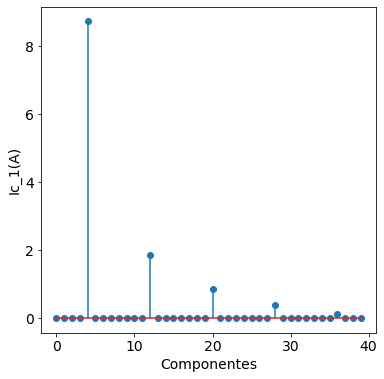

In [28]:
Idsf = DFT(idst)

print('Id0 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[0]      ), np.angle((Idsf[0]      ))/np.pi*180 ) )
print('Id1 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT]   ), np.angle((Idsf[numT]   ))/np.pi*180 ) )
print('Id2 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*2] ), np.angle((Idsf[numT*2] ))/np.pi*180 ) )
print('Id3 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*3] ), np.angle((Idsf[numT*3] ))/np.pi*180 ) )
print('Id4 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*4] ), np.angle((Idsf[numT*4] ))/np.pi*180 ) )
print('Id5 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*5] ), np.angle((Idsf[numT*5] ))/np.pi*180 ) )
print('Id6 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*6] ), np.angle((Idsf[numT*6] ))/np.pi*180 ) )
print('Id7 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*7] ), np.angle((Idsf[numT*7] ))/np.pi*180 ) )
print('Id9 = {:1.3f} A, Phase= {:1.3f}'.format(abs(Idsf[numT*9] ), np.angle((Idsf[numT*9] ))/np.pi*180 ) )



# Grafico
plt.stem(abs(Idsf) )
plt.ylabel('Ic_1(A)')
plt.xlabel('Componentes')
plt.show()

In [14]:
# Calculo resistencia de carga para max excursion de salida
fc   = 100e6
VDD  = 110
Vmin = 10 

Qc = 10
Qo = np.inf

Rd  = (VDD -  Vmin)/(abs(Idsf[numT])) 
print(Rd)

Ls   = (1/Qc-1/Qo)*Rd/(2*np.pi*fc)

Cs   = 1/(Ls*(2*np.pi*fc)**2)

print('.param RL = {:1.2f}'.format(abs(RL)))

print('.param Ls = {:1.4e}'.format(abs(Ls)))
print('.param Cs = {:1.4e}'.format(abs(Cs)))

N1N2 = (Rd/2/RL)**0.5

print(N1N2)

Lp = Ls * (N1N2)**2 

print('.param Lp = {:1.4e}'.format(abs(Lp)))


11.453004342371315
.param RL = 50.00
.param Ls = 1.8228e-09
.param Cs = 1.3896e-09
0.33842287662584686
.param Lp = 2.0877e-10
